In [2]:
import pandas as pd 
import pickle
import transformers 
from sklearn.preprocessing import LabelEncoder


In [3]:
import numpy as np

In [4]:
jacinto = pickle.load(open('jacinto.pkl', 'rb'))

In [5]:
og = pd.read_csv(r"C:\Users\Juan\Desktop\Proyecto_final_NLP\phil_nlp.csv")

In [4]:
res = pd.read_csv(r"C:\Users\Juan\Desktop\Proyecto_final_NLP\datares.csv")

In [20]:
res.columns

Index(['author', 'title', 'work', 'palabras_filtradas', 'resumen'], dtype='object')

In [7]:
res.drop("work", axis=1, inplace=True )

In [8]:
res.drop("palabras_filtradas", axis=1, inplace=True )

In [23]:
resu = res.at[0, "resumen"]
resu

'war independence mistakenly denominatedthe revolutionary war struggle distinctlyconservative character way revolutionary thewar independence gave great impetusto process resulting known federation.then came constitution 1787 formationof called united states distinct nationality.the united states next passed two definite processesof crystallization one 1812-1814 whenthe second war great britain especiallyour naval victories kindled especially north fire patriotism conception nationality half century later presented stern issuein concrete form last complete unificationof community whether better worse nomatter hammered iron cemented blood.it established fact war independence mistakenly denominatedthe revolutionary war struggle distinctlyconservative character way revolutionary thewar independence gave great impetusto process resulting known federation.then came constitution 1787 formationof called united states distinct nationality.the united states next passed two definite processesof 

In [44]:
lst = resu.split()


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split as tts


In [48]:
predict1=" ".join(predict)

In [71]:
pred =jacinto.predict(X_train_padded)

42/42 [==============================] - 0s 7ms/step


In [52]:
og.head()

,title,author,school,sentence_spacy,sentence,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [11]:
X = og["sentence_lowered"]
y = og["school"]

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)


In [12]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [13]:
X = og["sentence_lowered"]
y = og["school"]


X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)



In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [15]:
y_train.value_counts()

analytic           42819
aristotle          39059
german_idealism    33772
plato              30585
continental        26997
phenomenology      22797
rationalism        18355
empiricism         16010
capitalism         14555
communism          14363
Name: school, dtype: int64

In [16]:
og.school.value_counts()

analytic           53445
aristotle          48779
german_idealism    42137
plato              38391
continental        33781
phenomenology      28573
rationalism        22950
empiricism         19931
capitalism         18194
communism          17959
Name: school, dtype: int64

In [17]:
label_encoder.classes_

array(['analytic', 'aristotle', 'capitalism', 'communism', 'continental',
       'empiricism', 'german_idealism', 'phenomenology', 'plato',
       'rationalism'], dtype=object)

In [25]:
max_sequence_length = 300  # Maximum sequence length for padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(res.at[200, "resumen"])

X_train_seq = tokenizer.texts_to_sequences(res.at[200, "resumen"])

X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)


In [5]:
res.at[200, "title"]

'Giordano Bruno'

In [26]:
pred =jacinto.predict(X_train_padded)


51/51 [==============================] - 0s 7ms/step


In [27]:
predicted_classes = np.argmax(pred, axis=1)
original_predictions = label_encoder.inverse_transform(predicted_classes)
original_predictions

array(['rationalism', 'rationalism', 'german_idealism', ..., 'plato',
       'rationalism', 'german_idealism'], dtype=object)

In [28]:
predicted_classes 


array([9, 9, 6, ..., 8, 9, 6], dtype=int64)

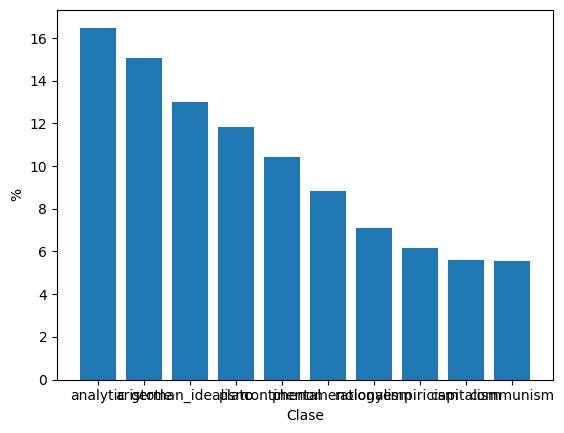

In [178]:
import matplotlib.pyplot as plt
 
clase = og["school"].value_counts()
clase_dis = clase / len(og) * 100

# Visualize the class distribution
plt.bar(clase_dis.index, clase_dis.values)
plt.xlabel('Clase')
plt.ylabel('%')

plt.show()


In [185]:
# Maravilloso, jacinto está overfiteado

In [183]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(label_encoder.classes_), 
                y=y_train)

In [184]:
class_weights

array([0.60560032, 0.66389821, 1.78160082, 1.8054167 , 0.96052154,
       1.6196877 , 0.76783134, 1.137483  , 0.84784044, 1.41275947])

In [12]:
og.title.value_counts()

Aristotle - Complete Works                                 48779
Plato - Complete Works                                     38391
Lewis - Papers                                             13120
The Search After Truth                                     12997
Kapital                                                    12997
The Wealth Of Nations                                      11693
Science Of Logic                                           10679
Philosophical Troubles                                      9799
Being And Time                                              8505
Madness And Civilization                                    8033
Essay Concerning Human Understanding                        7742
The Phenomenology Of Perception                             7592
Critique Of Pure Reason                                     7472
Quintessence                                                7373
The Phenomenology Of Spirit                                 7099
A Treatise Of Human Natur

In [11]:
m = og[og["school"]== "phenomenology"]
m.title.value_counts()

Being And Time                                           8505
The Phenomenology Of Perception                          7592
Off The Beaten Track                                     6734
The Crisis Of The European Sciences And Phenomenology    4832
The Idea Of Phenomenology                                 910
Name: title, dtype: int64

In [23]:
pd.set_option('display.max_rows', None)
res.author.unique()

array(['"\'Tis Sixty Years Since"',
       "A Beginner's History of Philosophy, Vol. 2: Modern Philosophy",
       'A Chosen Few: Short Stories',
       'A Critical History of Greek Philosophy',
       'A Discovrse of Fire and Salt',
       'A History of Mediaeval Jewish Philosophy',
       'A History of Philosophy in Epitome',
       'A New Philosophy: Henri Bergson',
       'A Philosophical Dictionary, Volume 01',
       'A Philosophical Dictionary, Volume 02',
       'A Philosophical Dictionary, Volume 03',
       'A Philosophical Dictionary, Volume 04',
       'A Philosophical Dictionary, Volume 05',
       'A Philosophical Dictionary, Volume 06',
       'A Philosophical Dictionary, Volume 08',
       'A Philosophical Dictionary, Volume 09',
       'A Philosophical Dictionary, Volume 10',
       'A Selection from the Discourses of Epictetus with the Encheiridion',
       'A System of Logic, Ratiocinative and Inductive',
       'A System of Logic, Ratiocinative and Inductive (Vol. 1